# Robust Fruit Image Classification of Perturbed Images using IndusNet
First we upload the IndusFruit dataset. The dataset contains 3,640 fruit images belonging to seven different fruit classes. The fruit classes included in the dataset are:

1.   Apple
2.   Banana
3.   Grape
4.   Mango
5.   Orange
6.   Strawberry
7.   Watermelon

The dataset is sub-divided into three subsets i.e. train (400 images per fruit class), validation (40 images per fruit class) and test (80 images per fruit class). 

## Model Definition

First we import the required packages:


In [3]:
import os
import shutil
import glob
import random
import cv2
from tensorflow.keras.applications.vgg16 import VGG16
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint

Now we define the IndusNet model:

In [4]:
indusNetModel=models.Sequential()

indusNetModel.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)))
indusNetModel.add(layers.Conv2D(64, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
indusNetModel.add(layers.Dropout(0.2))

indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
indusNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
indusNetModel.add(layers.Dropout(0.2))

indusNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(512, (3, 3), activation='relu'))
indusNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
indusNetModel.add(layers.Dropout(0.2))

indusNetModel.add(layers.Flatten())
indusNetModel.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
indusNetModel.add(layers.Dropout(0.2))
indusNetModel.add(layers.Dense(7, activation='softmax'))

indusNetModel.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
indusNetModel.summary()

filepath="IndusNet_7_classes_100_100_2nd Experiment.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 92, 92, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 128)       1

In [5]:
resized_images_100_100_train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train'
resized_images_100_100_test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test'
resized_images_100_100_validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation'

Here we set data generators for model training, validation and testing:

In [6]:
batch_size=16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation  and test data should not be augmented!
validation_datagen=ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        resized_images_100_100_train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(
        resized_images_100_100_validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

test_generator = test_datagen.flow_from_directory(
        resized_images_100_100_test_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 2800 images belonging to 7 classes.
Found 280 images belonging to 7 classes.
Found 560 images belonging to 7 classes.


In [7]:
number_of_training_samples=2800
number_of_validation_samples=280
number_of_test_samples=560

## Model Training
Now we train and validate our model on regular images:

In [ ]:
import math

history = indusNetModel.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=400,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/400
175/175 [==============================] - 30s 173ms/step - loss: 1.8853 - categorical_accuracy: 0.2175 - val_loss: 1.7256 - val_categorical_accuracy: 0.3162
Epoch 2/400
175/175 [==============================] - 30s 171ms/step - loss: 1.7358 - categorical_accuracy: 0.2714 - val_loss: 1.6409 - val_categorical_accuracy: 0.3382
Epoch 3/400
175/175 [==============================] - 30s 171ms/step - loss: 1.5626 - categorical_accuracy: 0.3621 - val_loss: 1.4211 - val_categorical_accuracy: 0.4743
Epoch 4/400
175/175 [==============================] - 30s 171ms/step - loss: 1.4548 - categorical_accuracy: 0.4050 - val_loss: 1.2699 - val_categorical_accuracy: 0.4522
Epoch 5/400
175/175 [==============================] - 30s 170ms/step - loss: 1.3902 - categorical_accuracy: 0.4186 - val_loss: 1.3137 - val_categorical_accuracy: 0.5000
Epoch 6/400
175/175 [==============================] - 30s 170ms/step - lo

Here, we visualize training of our model on regular images:

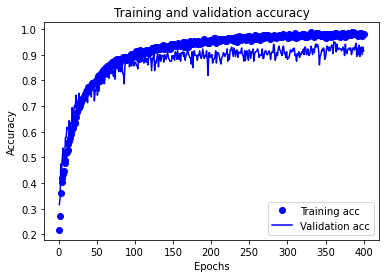

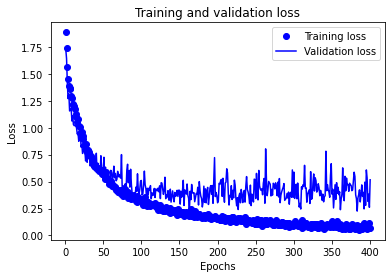

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Loading Train and Test Data Images

In [8]:
import glob
from pathlib import Path
from tensorflow.keras.utils import to_categorical
import cv2

apple_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train\\apple')
banana_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train\\banana')
orange_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train\\orange')
watermelon_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train\\watermelon')
mango_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train\\mango')
grape_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train\\grape')
strawberry_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train\\strawberry')

apple_cases = apple_cases_dir.glob('*.jpg')
banana_cases = banana_cases_dir.glob('*.jpg')
orange_cases = orange_cases_dir.glob('*.jpg')
watermelon_cases = watermelon_cases_dir.glob('*.jpg')
mango_cases = mango_cases_dir.glob('*.jpg')
grape_cases = grape_cases_dir.glob('*.jpg')
strawberry_cases = strawberry_cases_dir.glob('*.jpg')

train_data = []
train_labels = []

for img in apple_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    train_data.append(img)
    train_labels.append(label)

for img in banana_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    train_data.append(img)
    train_labels.append(label)

for img in grape_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [2]
    train_data.append(img)
    train_labels.append(label)
    
for img in mango_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [3]
    train_data.append(img)
    train_labels.append(label)

for img in orange_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [4]
    train_data.append(img)
    train_labels.append(label)

for img in strawberry_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [5]
    train_data.append(img)
    train_labels.append(label)

for img in watermelon_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [6]
    train_data.append(img)
    train_labels.append(label)

train_data = np.array(train_data)
train_labels = np.array(train_labels)
train_labels_one_hot_encoding=to_categorical(train_labels)

print("Total number of train examples: ", train_data.shape)
print("Total number of train labels:", train_labels.shape)

Total number of train examples:  (2800, 100, 100, 3)
Total number of train labels: (2800, 1)


In [10]:
apple_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\apple')
banana_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\banana')
orange_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\orange')
watermelon_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\watermelon')
mango_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\mango')
grape_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\grape')
strawberry_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\strawberry')

apple_cases = apple_cases_dir.glob('*.jpg')
banana_cases = banana_cases_dir.glob('*.jpg')
orange_cases = orange_cases_dir.glob('*.jpg')
watermelon_cases = watermelon_cases_dir.glob('*.jpg')
mango_cases = mango_cases_dir.glob('*.jpg')
grape_cases = grape_cases_dir.glob('*.jpg')
strawberry_cases = strawberry_cases_dir.glob('*.jpg')

test_data = []
test_labels = []

for img in apple_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)

for img in banana_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)

for img in grape_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [2]
    test_data.append(img)
    test_labels.append(label)
    
for img in mango_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [3]
    test_data.append(img)
    test_labels.append(label)

for img in orange_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [4]
    test_data.append(img)
    test_labels.append(label)

for img in strawberry_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [5]
    test_data.append(img)
    test_labels.append(label)

for img in watermelon_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [6]
    test_data.append(img)
    test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of test labels:", test_labels.shape)

Total number of test examples:  (560, 100, 100, 3)
Total number of test labels: (560, 1)


## Loading and Evaluating the Best Model
Now we load the best model obtained as a result of training on regular images. 

In [11]:
from tensorflow.python.keras.models import load_model

best_model = load_model('IndusNet_7_classes_100_100_2nd Experiment.h5')

Now we evaluate the best model on the test set of regular images:

In [12]:
# Evaluation on test dataset

test_loss, test_score = best_model.evaluate(test_data, test_labels_one_hot_encoding, batch_size=8)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

70/70 [==============================] - 2s 29ms/step - loss: 0.4080 - categorical_accuracy: 0.9232
Loss on test set:  0.40804198384284973
Accuracy on test set:  0.9232142567634583


# Generation of Adversarial Images for Model Fine-Tuning
First we import some packages..

In [13]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

import random

import matplotlib.pyplot as plt

Here we define a function that will generate adversarial pattern using Fast Gradient Signed Method (FGSM). FGSM enables us to perform white box untargeted attack.

In [14]:
def adversarial_pattern(image, label):
    image = tf.cast(image, tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = best_model(image)
        loss = tf.keras.losses.MSE(label, prediction)
    
    gradient = tape.gradient(loss, image)
    
    signed_grad = tf.sign(gradient)
    
    return signed_grad

Here we generate a sample adversarial image....

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


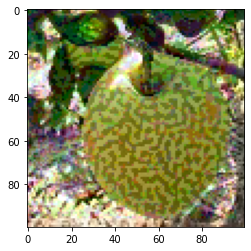

In [15]:
img_rows=100
img_cols=100
channels=3
image = train_data[50]
image_label=train_labels[50]
perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), image_label).numpy()
adversarial = image + perturbations * 0.1
plt.imshow(adversarial.reshape((img_rows, img_cols, channels)))
plt.show()

Here we display the same image in its original form:

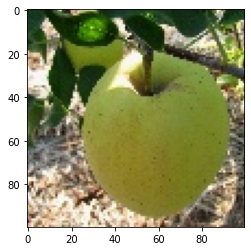

In [16]:
plt.imshow(train_data[50])

Predicting the fruit image class for both the original image as well as the perturbed image using the model trained solely on regular images.

In [17]:
print(best_model.predict(image.reshape((1, img_rows, img_cols, channels))).argmax())
print(best_model.predict(adversarial).argmax())

0
2


Now we define data generators for both train and test adversarial images:

In [18]:
# Adversarial train data generator
def generate_train_adversarials(batch_size):
    while True:
        x = []
        y = []
        for batch in range(batch_size):
            N = random.randint(0, 2799)

            label = train_labels[N]
            image = train_data[N]
            
            perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), label).numpy()
            
            
            epsilon = 0.1
            adversarial = image + perturbations * epsilon
            
            x.append(adversarial)
            y.append(train_labels[N])
        
        
        x = np.asarray(x).reshape((batch_size, img_rows, img_cols, channels))
        y = np.asarray(y)
        
        yield x, y

In [19]:
# Adversarial test data generator
def generate_test_adversarials(batch_size):
    while True:
        x = []
        y = []
        for batch in range(batch_size):
            N = random.randint(0, 559)

            label = test_labels[N]
            image = test_data[N]
            
            perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), label).numpy()
            
            
            epsilon = 0.1
            adversarial = image + perturbations * epsilon
            
            x.append(adversarial)
            y.append(test_labels[N])
        
        
        x = np.asarray(x).reshape((batch_size, img_rows, img_cols, channels))
        y = np.asarray(y)
        
        yield x, y

Here we generate 20 adversarial images. We use the model (trained on regular images) to predict their class. The true class is shown along with the predicted class.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: 5 Truth: [5]


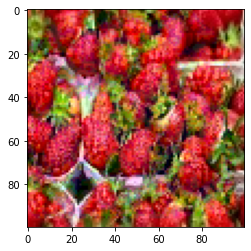

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: 2 Truth: [2]


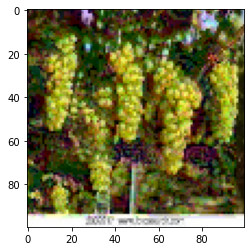

Prediction: 2 Truth: [3]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


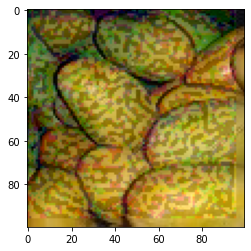

Prediction: 2 Truth: [2]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


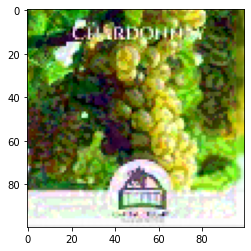

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: 1 Truth: [1]


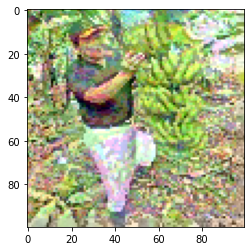

Prediction: 6 Truth: [6]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


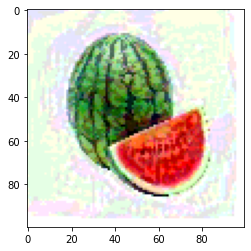

Prediction: 5 Truth: [5]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


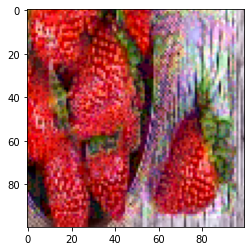

Prediction: 1 Truth: [1]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


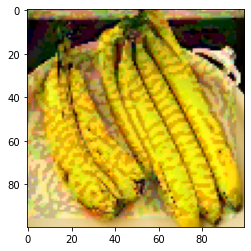

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: 1 Truth: [1]


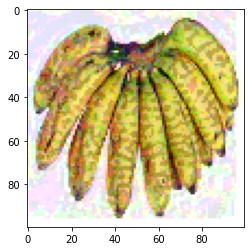

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: 2 Truth: [2]


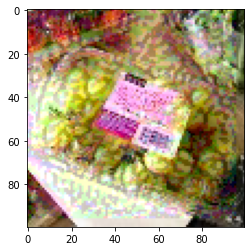

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: 6 Truth: [6]


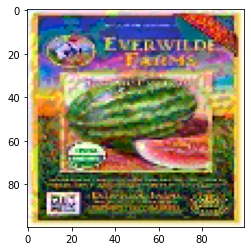

Prediction: 0 Truth: [4]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


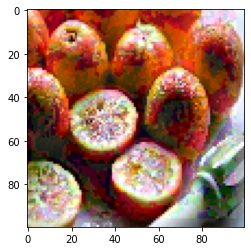

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: 4 Truth: [4]


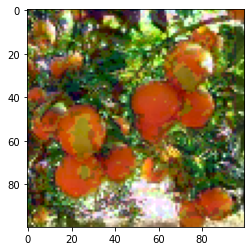

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: 4 Truth: [4]


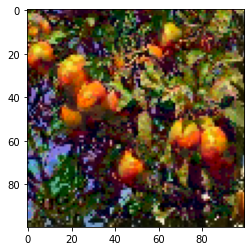

Prediction: 1 Truth: [1]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


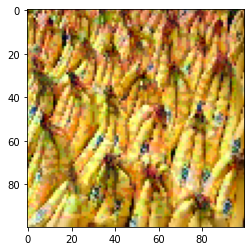

Prediction: 1 Truth: [1]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


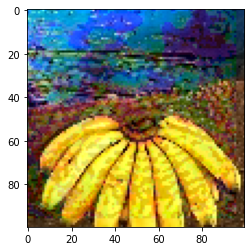

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: 6 Truth: [6]


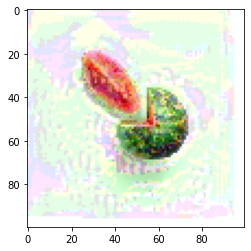

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: 4 Truth: [3]


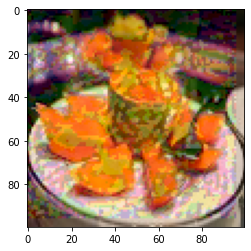

Prediction: 5 Truth: [5]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


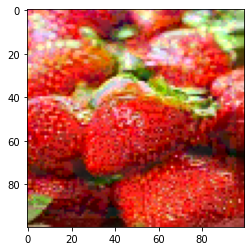

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: 3 Truth: [3]


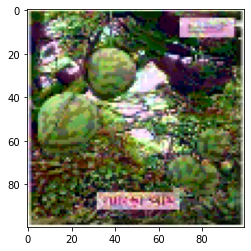

In [20]:
# Generate and visualize 20 test adversarial images
adversarials, correct_labels = next(generate_test_adversarials(20))
for adversarial, correct_label in zip(adversarials, correct_labels):
    print('Prediction:', best_model.predict(adversarial.reshape((1, img_rows, img_cols, channels))).argmax(), 'Truth:', correct_label)
    plt.imshow(adversarial)
    plt.show()

Adversarial test images created and stored....

In [21]:
img_rows=100
img_cols=100
channels=3
adversarial_test_data=[]
adversarial_test_labels=[]
for i in range(test_data.shape[0]):
  image = test_data[i]
  image_label=test_labels[i]
  perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), image_label).numpy()
  adversarial=image + perturbations * 0.1
  adversarial_test_data.append(adversarial)  
  adversarial_test_labels.append(image_label)  
adversarial_test_data=np.array(adversarial_test_data).reshape(-1,100,100,3)
adversarial_test_labels=np.array(adversarial_test_labels).reshape(-1,1)
print(adversarial_test_data.shape)
print(adversarial_test_labels.shape)

(560, 100, 100, 3)
(560, 1)


Here, we evaluate the best model (not fine tuned yet!) on adversarial test images.

In [22]:
best_model.evaluate(x=adversarial_test_data, y=to_categorical(adversarial_test_labels,7), verbose=1)

18/18 [==============================] - 2s 131ms/step - loss: 3.2331 - categorical_accuracy: 0.7786


[3.2331135272979736, 0.7785714268684387]

## Fine Tuning of the Original Best Model using 100 Adversarial Images
Original best model (i.e. the model trained on regular images only) is now loaded..

In [23]:
best_model_fine_tuned_on_100_adversarial_images = load_model('IndusNet_7_classes_100_100_2nd Experiment.h5')

100 perturbed images are generated. These images are to be used for fine tuning the original model.

In [24]:
x_adversarial_train, y_adversarial_train = next(generate_train_adversarials(100))

Here, we are fine tuning the original model using the 100 perturbed images.

In [25]:
best_model_fine_tuned_on_100_adversarial_images.fit(x_adversarial_train, to_categorical(y_adversarial_train,7),
          batch_size=32,
          epochs=50)

Epoch 1/50
4/4 [==============================] - 2s 605ms/step - loss: 1.5925 - categorical_accuracy: 0.8100
Epoch 2/50
4/4 [==============================] - 1s 207ms/step - loss: 0.9272 - categorical_accuracy: 0.8600
Epoch 3/50
4/4 [==============================] - 1s 207ms/step - loss: 0.3887 - categorical_accuracy: 0.9200
Epoch 4/50
4/4 [==============================] - 1s 207ms/step - loss: 0.2345 - categorical_accuracy: 0.9500
Epoch 5/50
4/4 [==============================] - 1s 207ms/step - loss: 0.1059 - categorical_accuracy: 0.9500
Epoch 6/50
4/4 [==============================] - 1s 207ms/step - loss: 0.2136 - categorical_accuracy: 0.9800
Epoch 7/50
4/4 [==============================] - 1s 213ms/step - loss: 0.0780 - categorical_accuracy: 0.9800
Epoch 8/50
4/4 [==============================] - 1s 208ms/step - loss: 0.0856 - categorical_accuracy: 0.9800
Epoch 9/50
4/4 [==============================] - 1s 207ms/step - loss: 0.0585 - categorical_accuracy: 0.9900
Epoch 10/5

Here, we are evaluating the fine tuned model on the test set of regular images.

In [26]:
best_model_fine_tuned_on_100_adversarial_images.evaluate(x=test_data, y=to_categorical(test_labels,7), verbose=0)

[0.9800028204917908, 0.8339285850524902]

Here, we are evaluating the fine tuned model on the test set of adversarial images.

In [27]:
best_model_fine_tuned_on_100_adversarial_images.evaluate(x=adversarial_test_data, y=to_categorical(adversarial_test_labels,7), verbose=1)

18/18 [==============================] - 1s 83ms/step - loss: 1.8245 - categorical_accuracy: 0.8625


[1.824545979499817, 0.862500011920929]

## Fine Tuning of the Original Best Model using 1000 Adversarial Images

Again, we load the original best model trained only on regular images. The model is also evaluated on the regular images test set:

In [28]:
best_model_fine_tuned_on_1000_adversarial_images = load_model('IndusNet_7_classes_100_100_2nd Experiment.h5')
best_model_fine_tuned_on_1000_adversarial_images.evaluate(x=test_data, y=to_categorical(test_labels,7), verbose=0)

[0.4080421030521393, 0.9232142567634583]

Now, we generate 1000 adversarial train samples:

In [29]:
x_adversarial_train, y_adversarial_train = next(generate_train_adversarials(1000))

Here, we fine tune the original model using the 1000 adversarial train images generated:

In [30]:
best_model_fine_tuned_on_1000_adversarial_images.fit(x_adversarial_train, to_categorical(y_adversarial_train,7),
          batch_size=32,
          epochs=50)

Epoch 1/50
32/32 [==============================] - 10s 322ms/step - loss: 0.4590 - categorical_accuracy: 0.9090
Epoch 2/50
32/32 [==============================] - 9s 282ms/step - loss: 0.1439 - categorical_accuracy: 0.9600
Epoch 3/50
32/32 [==============================] - 9s 282ms/step - loss: 0.0802 - categorical_accuracy: 0.9790
Epoch 4/50
32/32 [==============================] - 9s 283ms/step - loss: 0.0568 - categorical_accuracy: 0.9890
Epoch 5/50
32/32 [==============================] - 9s 283ms/step - loss: 0.0400 - categorical_accuracy: 0.9950
Epoch 6/50
32/32 [==============================] - 9s 284ms/step - loss: 0.0304 - categorical_accuracy: 0.9970
Epoch 7/50
32/32 [==============================] - 9s 283ms/step - loss: 0.0328 - categorical_accuracy: 0.9980
Epoch 8/50
32/32 [==============================] - 9s 283ms/step - loss: 0.0294 - categorical_accuracy: 0.9950
Epoch 9/50
32/32 [==============================] - 9s 284ms/step - loss: 0.0241 - categorical_accuracy

The fine tuned model is now evaluated on the test set of regular images:

In [31]:
best_model_fine_tuned_on_1000_adversarial_images.evaluate(x=test_data, y=to_categorical(test_labels,7), verbose=0)

[1.4399340152740479, 0.8214285969734192]

The fine tuned model is then evaluated on the adversarial test images:

In [32]:
best_model_fine_tuned_on_1000_adversarial_images.evaluate(x=adversarial_test_data, y=to_categorical(adversarial_test_labels,7), verbose=1)

18/18 [==============================] - 1s 80ms/step - loss: 2.4408 - categorical_accuracy: 0.9089


[2.440786361694336, 0.9089285731315613]

## Fine Tuning of the Original Best Model using 2000 Adversarial Images
First, the original best model is loaded. The model has been trained solely on regular images. 

In [33]:
best_model_fine_tuned_on_2000_adversarial_images = load_model('IndusNet_7_classes_100_100_2nd Experiment.h5')
best_model_fine_tuned_on_2000_adversarial_images.evaluate(x=test_data, y=to_categorical(test_labels,7), verbose=0)

[0.4080421030521393, 0.9232142567634583]

2000 train adversarial images are generated:

In [34]:
x_adversarial_train, y_adversarial_train = next(generate_train_adversarials(2000))

The original best model is fine tuned using the 2000 generated adversarial train images:

In [35]:
best_model_fine_tuned_on_2000_adversarial_images.fit(x_adversarial_train, to_categorical(y_adversarial_train,7),
          batch_size=32,
          epochs=50)

Epoch 1/50
63/63 [==============================] - 20s 312ms/step - loss: 0.3739 - categorical_accuracy: 0.9215
Epoch 2/50
63/63 [==============================] - 18s 288ms/step - loss: 0.0902 - categorical_accuracy: 0.9775
Epoch 3/50
63/63 [==============================] - 18s 288ms/step - loss: 0.0527 - categorical_accuracy: 0.9870
Epoch 4/50
63/63 [==============================] - 18s 287ms/step - loss: 0.0407 - categorical_accuracy: 0.9925
Epoch 5/50
63/63 [==============================] - 18s 287ms/step - loss: 0.0284 - categorical_accuracy: 0.9965
Epoch 6/50
63/63 [==============================] - 18s 289ms/step - loss: 0.0252 - categorical_accuracy: 0.9980
Epoch 7/50
63/63 [==============================] - 18s 289ms/step - loss: 0.0210 - categorical_accuracy: 1.0000
Epoch 8/50
63/63 [==============================] - 18s 289ms/step - loss: 0.0208 - categorical_accuracy: 0.9985
Epoch 9/50
63/63 [==============================] - 18s 289ms/step - loss: 0.0202 - categorical_

Fine tuned model is evaluated on the test set of regular images:

In [36]:
best_model_fine_tuned_on_2000_adversarial_images.evaluate(x=test_data, y=to_categorical(test_labels,7), verbose=0)

[1.0155857801437378, 0.8321428298950195]

Fine tuned model is evaluated on the test set of adversarial images:

In [37]:
best_model_fine_tuned_on_2000_adversarial_images.evaluate(x=adversarial_test_data, y=to_categorical(adversarial_test_labels,7), verbose=1)

18/18 [==============================] - 1s 81ms/step - loss: 1.7372 - categorical_accuracy: 0.9214


[1.7371872663497925, 0.9214285612106323]

## Fine Tuning of the Original Best Model using 3000 Adversarial Images

The original best model is loaded again.

In [38]:
best_model_fine_tuned_on_3000_adversarial_images = load_model('IndusNet_7_classes_100_100_2nd Experiment.h5')
best_model_fine_tuned_on_3000_adversarial_images.evaluate(x=test_data, y=to_categorical(test_labels,7), verbose=0)

[0.4080421030521393, 0.9232142567634583]

3000 adversarial train images are generated:

In [39]:
x_adversarial_train, y_adversarial_train = next(generate_train_adversarials(3000))

The original best model is fine tuned using the generated 3000 adversarial train images: 

In [40]:
best_model_fine_tuned_on_3000_adversarial_images.fit(x_adversarial_train, to_categorical(y_adversarial_train,7),
          batch_size=32,
          epochs=50)

Epoch 1/50
94/94 [==============================] - 30s 322ms/step - loss: 0.2929 - categorical_accuracy: 0.9397
Epoch 2/50
94/94 [==============================] - 27s 290ms/step - loss: 0.0877 - categorical_accuracy: 0.9800
Epoch 3/50
94/94 [==============================] - 27s 290ms/step - loss: 0.0588 - categorical_accuracy: 0.9903
Epoch 4/50
94/94 [==============================] - 27s 291ms/step - loss: 0.0433 - categorical_accuracy: 0.9927
Epoch 5/50
94/94 [==============================] - 27s 290ms/step - loss: 0.0326 - categorical_accuracy: 0.9957
Epoch 6/50
94/94 [==============================] - 27s 290ms/step - loss: 0.0443 - categorical_accuracy: 0.9933
Epoch 7/50
94/94 [==============================] - 27s 290ms/step - loss: 0.0237 - categorical_accuracy: 0.9987
Epoch 8/50
94/94 [==============================] - 27s 290ms/step - loss: 0.0199 - categorical_accuracy: 0.9997
Epoch 9/50
94/94 [==============================] - 27s 290ms/step - loss: 0.0217 - categorical_

The fine tuned model is evaluated on the test set of regular images:

In [41]:
best_model_fine_tuned_on_3000_adversarial_images.evaluate(x=test_data, y=to_categorical(test_labels,7), verbose=0)

[1.71565580368042, 0.762499988079071]

Finally, the fine tuned model is evaluated on the test set of adversarial images:

In [42]:
best_model_fine_tuned_on_3000_adversarial_images.evaluate(x=adversarial_test_data, y=to_categorical(adversarial_test_labels,7), verbose=1)

18/18 [==============================] - 1s 78ms/step - loss: 1.5584 - categorical_accuracy: 0.9161


[1.558388113975525, 0.9160714149475098]